In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Fonte: pesquisa origem e destino SP 2017

data = pd.read_excel('Tab01_OD2017.xlsx')
data.head(20)

,Tabela 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Dados Gerais por Zona de Pesquisa – 2017,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,rev. 15/04/2021
1,Região Metropolitana de São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pesquisa Origem e Destino 2017,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
3,Companhia do Metropolitano de São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Matrículas,NaN,Automóveis,Viagens,Viagens,NaN
6,Zona,Nome,Domicílios,Famílias,População,Escolares,Empregos,Particulares,Produzidas,Atraidas,Área (ha)
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Sé,1151.0,1151.0,3262.000949,6363.217715,71852.313532,325.532916,160502.925216,160157.486349,57.1
9,2,Parque Dom Pedro,2342.0,2342.0,5695.000762,1433.318516,51853.737311,890.697572,137231.73543,138306.410674,113.64


In [3]:
data.columns

Index(['Tabela 1', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

In [4]:
#renomeando colunas
data = data.rename(columns= {'Tabela 1':'Zona', 'Unnamed: 1': 'Nome', 'Unnamed: 2':'Domicilios', 'Unnamed: 3': 'Familias', 'Unnamed: 4': 'Populacao',
                              'Unnamed: 5':'Escolares', 'Unnamed: 6':'Empregos', 'Unnamed: 7':'Particulares',
                                'Unnamed: 8':'Produzidas', 'Unnamed: 9':'Atraidas', 'Unnamed: 10':'Area'})

In [5]:
data.dropna(how='all',inplace=True) #deletando linhas completamente vazias



In [6]:
data = data.drop(data.iloc[0:6].index)
data = data.drop(data.iloc[519:525].index)
data.drop(525, inplace=True)
data.drop(526, inplace=True)

#excluindo linhas com comentarios 





In [7]:
data_filtrado = data[data['Area'] < 10000] #filtrando Area menores que 10000 alqueires


[Text(0.5, 0, 'Área em alqueires'), Text(0, 0.5, 'População')]

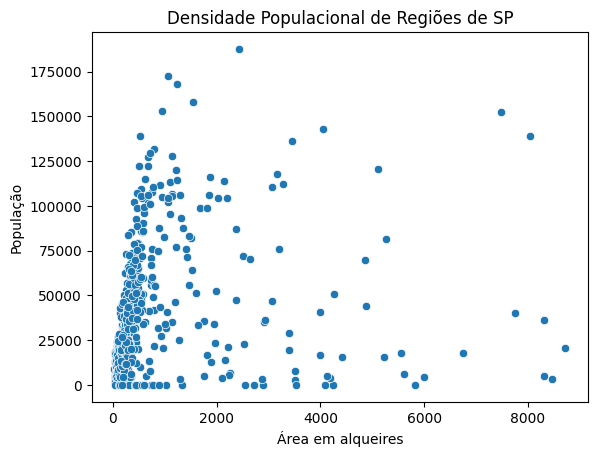

In [8]:
ax = sns.scatterplot(data=data_filtrado, x='Area', y='Populacao')
ax.set_title('Densidade Populacional de Regiões de SP')
ax.set(xlabel='Área em alqueires', ylabel='População')

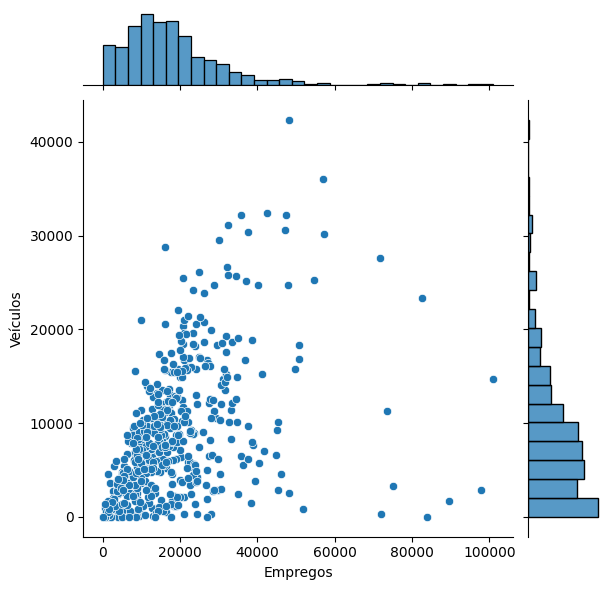

In [9]:
ax = sns.jointplot(data=data, x='Empregos', y='Particulares')
ax.set_axis_labels(xlabel='Empregos', ylabel='Veículos')

In [10]:
data.head()

,Zona,Nome,Domicilios,Familias,Populacao,Escolares,Empregos,Particulares,Produzidas,Atraidas,Area
8,1,Sé,1151.0,1151.0,3262.000949,6363.217715,71852.313532,325.532916,160502.925216,160157.486349,57.1
9,2,Parque Dom Pedro,2342.0,2342.0,5695.000762,1433.318516,51853.737311,890.697572,137231.73543,138306.410674,113.64
10,3,Praça João Mendes,7100.0,7100.0,17130.00098,2398.531403,18547.346834,1166.006309,62970.990982,62502.837037,47.75
11,4,Ladeira da Memória,12588.0,12588.0,24088.99888,1126.743691,22553.940604,3400.885137,78183.968944,78285.562275,75.11
12,5,República,8050.0,8050.0,14955.99988,1726.852474,89486.655495,1737.251475,186219.616198,187152.743515,74.95


In [11]:
data.loc[data['Zona'] == 516]

,Zona,Nome,Domicilios,Familias,Populacao,Escolares,Empregos,Particulares,Produzidas,Atraidas,Area
523,516,Santana de Parnaíba,41864.0,41864.0,131607.978849,32126.352596,48247.730904,42320.336761,213606.752452,214741.585505,18034.76


In [12]:
mask = data['Zona'].isin([421,422,449]) #separando dados para verificação pontual
abc = data[mask]
abc

,Zona,Nome,Domicilios,Familias,Populacao,Escolares,Empregos,Particulares,Produzidas,Atraidas,Area
428,421,São Caetano do Sul,5083.0,5083.0,14828.001644,10062.583343,39405.721509,3874.86938,79322.42509,79502.213589,367.7
429,422,Santo André,21667.0,21667.0,55759.000059,56298.378686,82692.389081,23294.486264,335586.329429,336063.652795,795.2
456,449,São Bernardo do Campo,25516.0,25516.0,67205.014567,34750.782177,71660.581198,27567.911885,252675.72615,252354.37932,742.96


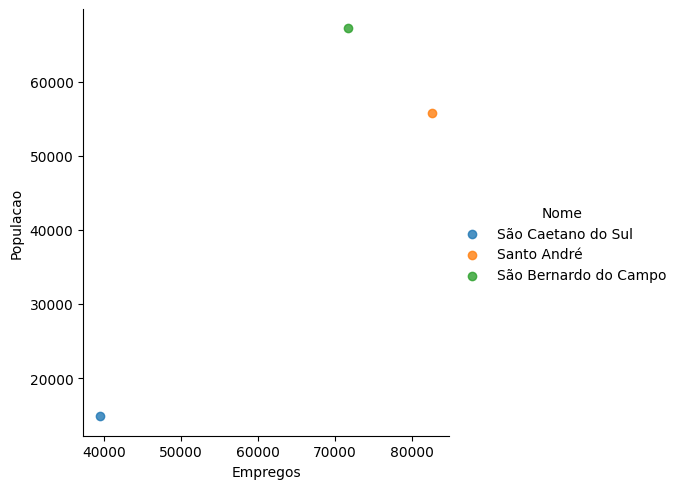

In [13]:
ax = sns.lmplot(data=abc, x='Empregos', y='Populacao',
                 hue='Nome' )

In [14]:
data.loc[data['Zona'] == 401
         
         ]

,Zona,Nome,Domicilios,Familias,Populacao,Escolares,Empregos,Particulares,Produzidas,Atraidas,Area
408,401,Suzano,43772.0,43772.0,136108.002279,43724.104425,54715.28361,25266.113903,304051.215549,303346.909997,3452.13


In [15]:
transportes = pd.read_excel('Tab16_OD2017.xlsx')
transportes = transportes.rename(columns= {'Tabela 16':'Zona', 'Unnamed: 1':'Metro', 'Unnamed: 2':'Trem', 'Unnamed: 3':'Onibus', 'Unnamed: 4':'Fretado',
       'Unnamed: 5':'Escolar', 'Unnamed: 6':'Automovel', 'Unnamed: 7':'Carona', 'Unnamed: 8':'Taxi', 'Unnamed: 9':'Uber',
       'Unnamed: 10':'Moto', 'Unnamed: 11':'CaronaMoto', 'Unnamed: 12':'Bicicleta', 'Unnamed: 13':'Andando',
       'Unnamed: 14':'Outros', 'Unnamed: 15':'Vazio'})
transportes.head()

#lendo outra tabela e renomeando colunas

,Zona,Metro,Trem,Onibus,Fretado,Escolar,Automovel,Carona,Taxi,Uber,Moto,CaronaMoto,Bicicleta,Andando,Outros,Vazio
0,Viagens Diárias Produzidas por Modo Principal ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rev. 15/04/2021
1,Região Metropolitana de São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pesquisa Origem e Destino 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Companhia do Metropolitano de São Paulo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
transportes.columns

Index(['Zona', 'Metro', 'Trem', 'Onibus', 'Fretado', 'Escolar', 'Automovel',
       'Carona', 'Taxi', 'Uber', 'Moto', 'CaronaMoto', 'Bicicleta', 'Andando',
       'Outros', 'Vazio'],
      dtype='object')

In [17]:
transportes.dropna(thresh=2, inplace=True) #excluindo linhas que contém apenas 2 valores
transportes = transportes.drop(transportes.iloc[0:3].index) 
transportes = transportes.drop(transportes.iloc[518:529].index) #excluindo linhas com comentários
transportes.drop(527, inplace=True) #excluindo linha com a totalidade dos resultados


In [18]:
df = pd.merge(data, transportes, on='Zona') #criando um novo dataframe com duas tabelas
df = df.loc[df['Populacao'] !=0] #selecionando as linhas que o valor seja diferente de 0 usando como base a coluna andando


In [19]:
df.columns

Index(['Zona', 'Nome', 'Domicilios', 'Familias', 'Populacao', 'Escolares',
       'Empregos', 'Particulares', 'Produzidas', 'Atraidas', 'Area', 'Metro',
       'Trem', 'Onibus', 'Fretado', 'Escolar', 'Automovel', 'Carona', 'Taxi',
       'Uber', 'Moto', 'CaronaMoto', 'Bicicleta', 'Andando', 'Outros',
       'Vazio'],
      dtype='object')

In [20]:
df['motos'] = df['Moto'] + df['CaronaMoto']
df['carros'] = df['Automovel'] + df['Carona']
df['terceirizado'] = df['Escolar'] + df['Fretado']
df['taxi'] = df['Taxi'] + df['Uber']
df['pedestres'] = df['Andando'] + df['Bicicleta']
df['metropolitano'] = df['Metro'] + df['Trem']

#agregando colunas 


In [21]:
df.columns

Index(['Zona', 'Nome', 'Domicilios', 'Familias', 'Populacao', 'Escolares',
       'Empregos', 'Particulares', 'Produzidas', 'Atraidas', 'Area', 'Metro',
       'Trem', 'Onibus', 'Fretado', 'Escolar', 'Automovel', 'Carona', 'Taxi',
       'Uber', 'Moto', 'CaronaMoto', 'Bicicleta', 'Andando', 'Outros', 'Vazio',
       'motos', 'carros', 'terceirizado', 'taxi', 'pedestres',
       'metropolitano'],
      dtype='object')

In [22]:
df_att = df.drop(columns=['Domicilios', 'Familias', 'Escolares','Particulares','Produzidas','Atraidas',
                 'Metro','Trem','Fretado','Escolar','Automovel','Carona','Taxi','Uber','Moto','CaronaMoto',
                 'Bicicleta','Andando','Outros','Vazio'])

#criando novo dataset sem as colunas que foram agregadas

In [23]:
df_att.head()

,Zona,Nome,Populacao,Empregos,Area,Onibus,motos,carros,terceirizado,taxi,pedestres,metropolitano
0,1,Sé,3262.000949,71852.313532,57.1,29973.823144,1676.818827,13088.91166,202.469506,2313.895935,43854.802375,69295.699931
1,2,Parque Dom Pedro,5695.000762,51853.737311,113.64,25897.451856,4315.111795,21473.615396,39.771384,1236.428218,27531.337606,56328.921694
2,3,Praça João Mendes,17130.00098,18547.346834,47.75,7842.441278,664.296487,7415.681004,243.798168,1280.833344,24095.702602,20982.023087
3,4,Ladeira da Memória,24088.99888,22553.940604,75.11,13020.637135,321.591283,12807.124474,289.357261,3179.570864,28310.826162,19799.63917
4,5,República,14955.99988,89486.655495,74.95,27443.883024,3116.528137,17645.888301,245.58522,3993.500777,53275.475256,79591.369376


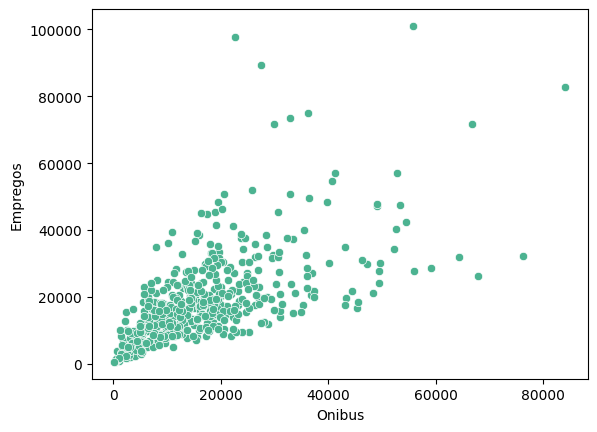

In [24]:
ax = sns.scatterplot(x=df_att['Onibus'], y=df['Empregos'],color="#4CB391", )

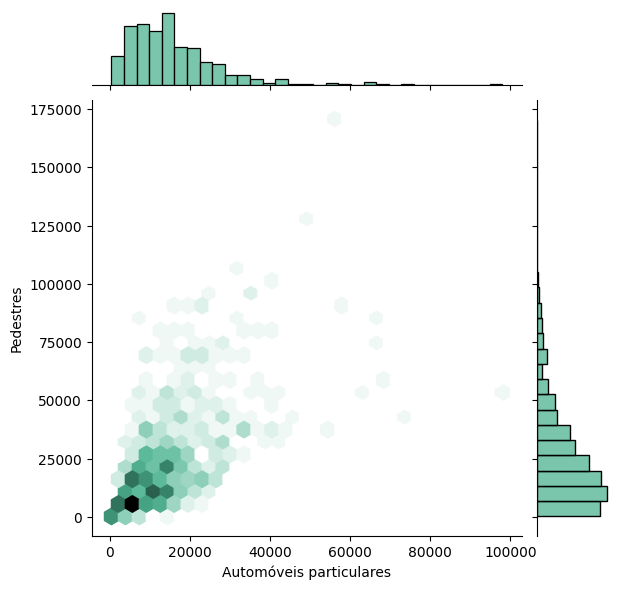

In [25]:
ax = sns.jointplot(x=df['Automovel'], y=df['Andando'], kind='hex',color="#4CB391")
ax.set_axis_labels(xlabel='Automóveis particulares', ylabel='Pedestres')

In [27]:
viagens = df_att.melt(id_vars=['Zona'],
                      value_vars=['Onibus','motos','carros','terceirizado','taxi','pedestres','metropolitano'],
                        value_name='Quanti', var_name='Tipos')
viagens = viagens.sort_values('Quanti', ascending=False)

#separando os dados que contem os meios de locomoção para plot futuro

C:\Users\ianki.DESKTOP-G971D0K\AppData\Local\Temp\ipykernel_21692\3072202409.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Pedestres','Carros', 'Ônibus','Metrô/Trêm', 'Fretado/Escolar','Motocicleta','Táxi'])


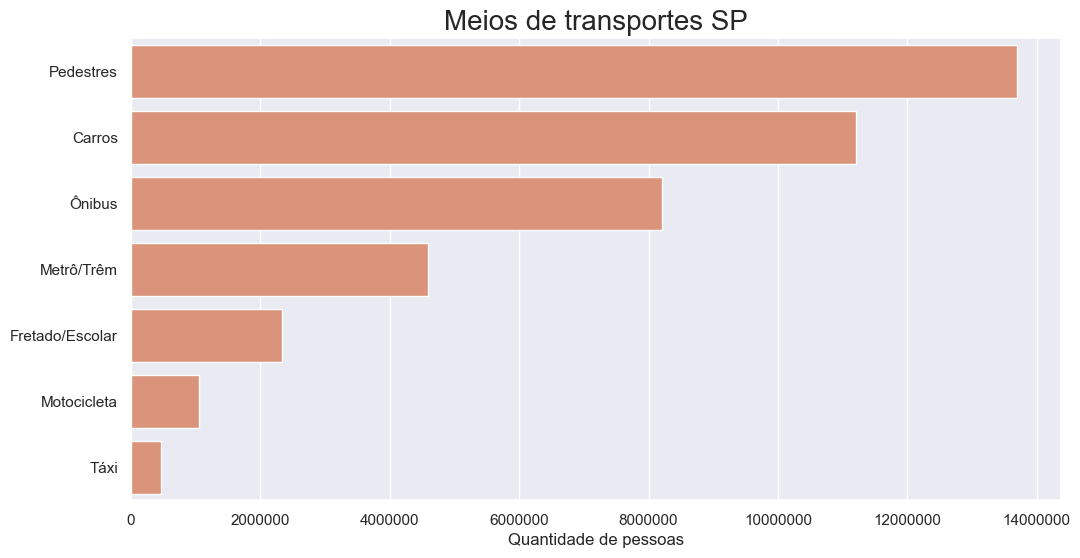

In [28]:
sns.set_theme(style='darkgrid')
sns.set_palette('flare')


f, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(y='Tipos', x='Quanti', data=viagens,
                  estimator=np.sum, errorbar='se')

ax.set_title('Meios de transportes SP', fontsize=20)
ax.set(xlabel='Quantidade de pessoas',ylabel='')
ax.set_yticklabels(['Pedestres','Carros', 'Ônibus','Metrô/Trêm', 'Fretado/Escolar','Motocicleta','Táxi'])
ax.ticklabel_format(axis='x', useOffset=False, style='plain')

In [30]:
df_att['Populacao'] = pd.to_numeric(df_att['Populacao']) #transformando dados do tipo objeto para numérico
df_att['Area'] = pd.to_numeric(df_att['Area'])

In [31]:
df_att['densidade'] = densidade = (df_att['Populacao'] / df_att['Area']) # fazendo o cálculo de densidade



In [32]:
densi_top = df_att.nlargest(12,'densidade')         #separando as maiores e menores densidades
densi_low = df_att.nsmallest(12, 'densidade')

In [33]:
densi_top.nlargest(5, 'densidade')

,Zona,Nome,Populacao,Empregos,Area,Onibus,motos,carros,terceirizado,taxi,pedestres,metropolitano,densidade
24,25,Treze de Maio,18401.001993,12141.892769,42.85,8739.55439,1007.685819,5366.600087,13.623998,1642.182092,18430.511381,5430.034632,429.428285
2,3,Praça João Mendes,17130.000980,18547.346834,47.75,7842.441278,664.296487,7415.681004,243.798168,1280.833344,24095.702602,20982.023087,358.743476
3,4,Ladeira da Memória,24088.998880,22553.940604,75.11,13020.637135,321.591283,12807.124474,289.357261,3179.570864,28310.826162,19799.63917,320.716268
35,36,Marechal Deodoro,43094.013960,33133.339433,142.20,18145.138109,1619.554852,28619.554504,1047.892084,4324.764757,28889.986707,30001.073511,303.052138
27,28,São Carlos do Pinhal,9068.002109,28432.501851,31.03,11723.648349,744.650374,14929.162175,731.032242,6006.347634,17085.16827,24951.391551,292.233391


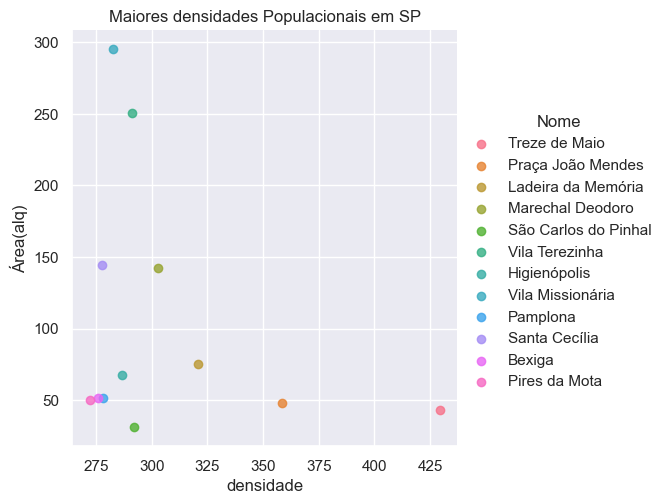

In [34]:
sns.set_palette('hls', 3,desat=0.75)
ax = sns.lmplot(data= densi_top, x='densidade', y='Area', hue='Nome')
ax.set(title='Maiores densidades Populacionais em SP', ylabel='Área(alq)')


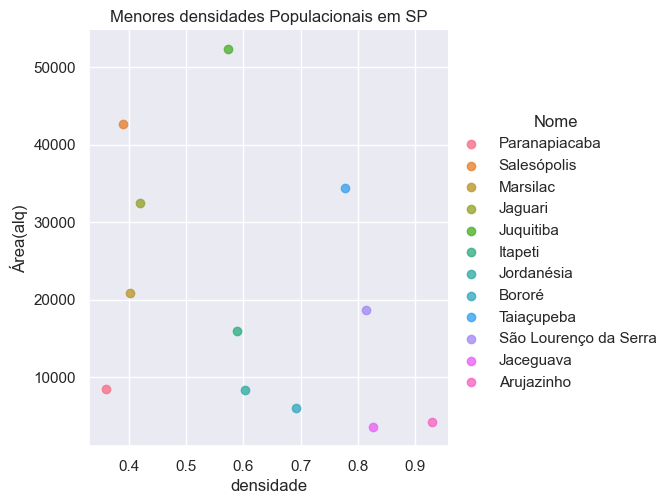

In [35]:
sns.set_palette('hls', 3,desat=0.75)
ax = sns.lmplot(data= densi_low, x='densidade', y='Area', hue='Nome')
ax.set(title='Menores densidades Populacionais em SP', ylabel='Área(alq)')


In [38]:
df_att.to_excel('C:/Users/ianki.DESKTOP-G971D0K/Downloads/testemobi.xlsx', index=False)